<a href="https://colab.research.google.com/github/Zaheer505/Tiny-ML/blob/main/Final_Temperature_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data = files.upload()
test_data = files.upload()

Saving data.csv to data.csv


Saving test_data.csv to test_data.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import dataset from data.csv file
dataset = pd.read_csv('data.csv')
training_set = dataset.iloc[:,0:1].values

In [ ]:
#Feature Scaling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set,)

In [ ]:
x_train = []
y_train = []

future = 7 # next 4 days temperature forecast
past = 30 # Past 30 days 

for i in range(0,len(training_set_scaled)- past - future + 1):
    x_train.append(training_set_scaled[i : i + past , 0])     
    y_train.append(training_set_scaled[i + past : i + past + future , 0 ])
    
x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1], 1) )

print (x_train)

[[[0.07492168]
  [0.12482211]
  [0.45632432]
  ...
  [0.56437475]
  [0.81417838]
  [0.98542203]]

 [[0.12482211]
  [0.45632432]
  [0.63435313]
  ...
  [0.81417838]
  [0.98542203]
  [0.95613394]]

 [[0.45632432]
  [0.63435313]
  [0.83157283]
  ...
  [0.98542203]
  [0.95613394]
  [0.90932751]]

 ...

 [[0.70443889]
  [0.43385855]
  [0.17858715]
  ...
  [0.17002208]
  [0.29293955]
  [0.48740059]]

 [[0.43385855]
  [0.17858715]
  [0.13196821]
  ...
  [0.29293955]
  [0.48740059]
  [0.64434296]]

 [[0.17858715]
  [0.13196821]
  [0.26445263]
  ...
  [0.48740059]
  [0.64434296]
  [0.89360973]]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Flatten
import tensorflow as tf
# Fitting RNN to training set using Keras Callbacks. Read Keras callbacks docs for more info.

In [ ]:
print(tf.__version__)

2.6.0


In [ ]:
regressor = Sequential()

regressor.add((Dense(units=30, input_shape = (x_train.shape[1],1) )))
regressor.add(Dense(units=30 , activation='relu'))
regressor.add(Dense(units=30 , activation='relu'))
regressor.add(Dense(units=30 , activation='relu'))
regressor.add(Flatten())
regressor.add(Dense(units = future))

regressor.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])

regressor.fit(x_train, y_train, epochs=100,batch_size=32 )

Epoch 1/100
40/40 [==============================] - 1s 3ms/step - loss: 0.1291 - acc: 0.4890
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0049 - acc: 0.6352
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0020 - acc: 0.6761
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 0.7020
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 0.7028
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 0.7075
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 0.7146
Epoch 8/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0018 - acc: 0.7131
Epoch 9/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 0.7138
Epoch 10/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 0.7123
Epoch 11/100
40/40 [==============================] - 0s 3m

In [ ]:
# read test dataset
testdataset = pd.read_csv('test_data.csv')

#get only the temperature column
testdataset = testdataset.iloc[:30,0:1].values

# Get the actual next 7 outputs of temperature for comparison
real_temp = pd.read_csv('test_data.csv')
real_temp = real_temp.iloc[30:37,0:1].values

testing = sc.transform(testdataset)
testing = np.array(testing)
testing = np.reshape(testing,(testing.shape[1],testing.shape[0],1))

print (testing)

[[[0.24262285]
  [0.57123011]
  [0.7751152 ]
  [0.8807869 ]
  [0.93303632]
  [0.94222086]
  [0.89679788]
  [0.7882808 ]
  [0.68905562]
  [0.4099226 ]
  [0.16777426]
  [0.10218868]
  [0.2271033 ]
  [0.46608702]
  [0.65738467]
  [0.91992441]
  [0.99408209]
  [0.9479488 ]
  [0.91623655]
  [0.8025986 ]
  [0.65580298]
  [0.47396242]
  [0.17674942]
  [0.08188194]
  [0.13161594]
  [0.41727766]
  [0.65517526]
  [0.84424286]
  [0.95400299]
  [0.98123861]]]


In [ ]:
predicted_temperature = regressor.predict(testing)
predicted_temperature = sc.inverse_transform(predicted_temperature)
predicted_temperature = np.reshape(predicted_temperature,(predicted_temperature.shape[1],predicted_temperature.shape[0]))

In [ ]:
print(real_temp, 'Real Temperature')
print(predicted_temperature, 'Predicted Temperature')

[[27.964 ]
 [25.1985]
 [20.9427]
 [15.7487]
 [10.9512]
 [ 9.2059]
 [10.7169]] Real Temperature
[[27.490316]
 [24.844858]
 [21.021345]
 [16.139875]
 [10.739781]
 [ 8.945537]
 [11.256235]] Predicted Temperature


**TF Started**

In [ ]:
tf_model_name = "temperature_model.h5"

In [ ]:
regressor.save(tf_model_name)

tf_lite_model_file_name = "tf_lite_model.tflite"

tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(regressor)
tf_lite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE] # optimizing for size 
tflite_model = tf_lite_converter.convert()

tflite_model_name = tf_lite_model_file_name
open(tflite_model_name, "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpt84yd8cm/assets


INFO:tensorflow:Assets written to: /tmp/tmpt84yd8cm/assets


27920

In [ ]:
interpreter = tf.lite.Interpreter(tf_lite_model_file_name)

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 1 30  1]
Input Type: <class 'numpy.float32'>
Output Shape: [1 7]
Output Type: <class 'numpy.float32'>


In [ ]:
check = pd.read_csv('test_data.csv')
check = check.iloc[:30,0:1].values

new_data = np.array(check, dtype=np.float32) # convert to new data type

# reshaping data for input to tf lite model
testx = sc.transform(new_data)
testx = np.array(testx)
testx = np.reshape(testx,(testx.shape[1],testx.shape[0],1))

# preparing to launch
interpreter.allocate_tensors()
interpreter.set_tensor(input_details[0]['index'], testx)
interpreter.invoke()

#pridicting from tf lite model
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])

#taking inverse and reshaping to show actual outputs
pt = sc.inverse_transform(tflite_model_predictions)
pt = np.reshape(pt,(pt.shape[1],pt.shape[0]))

print (real_temp, 'Real Temperature')
print(predicted_temperature, 'TF Predicted Temperature')
print (pt, 'TF Lite Predicted Temperature')


[[27.964 ]
 [25.1985]
 [20.9427]
 [15.7487]
 [10.9512]
 [ 9.2059]
 [10.7169]] Real Temperature
[[27.490316]
 [24.844858]
 [21.021345]
 [16.139875]
 [10.739781]
 [ 8.945537]
 [11.256235]] TF Predicted Temperature
[[27.43729 ]
 [24.903244]
 [21.165491]
 [16.073748]
 [10.608563]
 [ 8.939726]
 [11.219491]] TF Lite Predicted Temperature


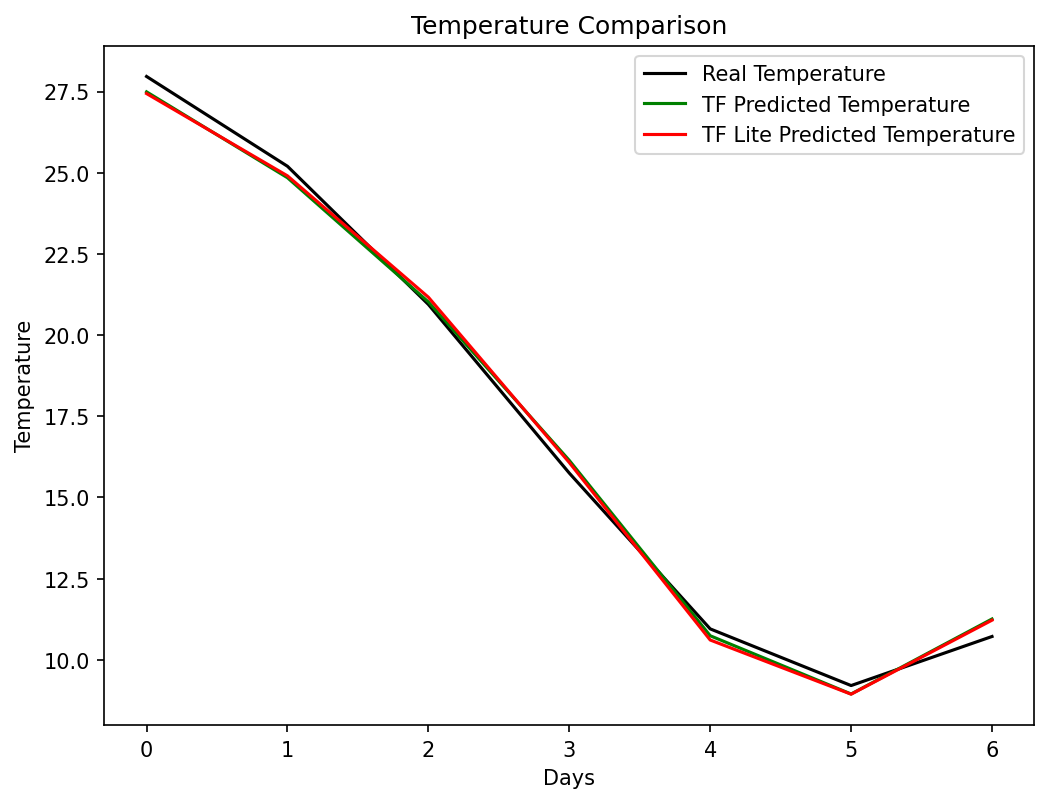

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=150)
plt.plot(real_temp, color = 'black', label = 'Real Temperature')
plt.plot(predicted_temperature, color = 'green', label = 'TF Predicted Temperature')
plt.plot(pt, color = 'red', label = 'TF Lite Predicted Temperature')
plt.title('Temperature Comparison')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.legend()
plt.show()